In [1]:
from cnmf import cNMF
import numpy as np
import pandas as pd
import scanpy as sc 
import phate, scprep
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
numiter=100 ## Set this to a larger value for real data. We set this to a low value here for illustration
numworkers=1 ## Set this to a larger value and use the parallel code cells to try out parallelization
numhvgenes=1500 ## Number of over-dispersed genes to use for running the factorizations
K = np.arange(3,8)

## Results will be saved to [output_directory]/[run_name] which in this example is simulated_example_data/example_cNMF
output_directory = './cnmf_results_numiter_100'
run_name = 't_cell_cnmf'

countfn = '/home/av622/palmer_scratch/all_cd8_t_cells.h5ad'
seed = 42

In [3]:
cnmf_obj = cNMF(output_dir=output_directory, name=run_name)

In [4]:
cnmf_obj.prepare(counts_fn=countfn, components=K, n_iter=numiter, seed=seed, 
                 genes_file='results/highly_variable_genes.txt') # same genes as we used in other approaches

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
cnmf_obj.factorize()

[Worker 0]. Starting task 0.
[Worker 0]. Starting task 1.
[Worker 0]. Starting task 2.
[Worker 0]. Starting task 3.
[Worker 0]. Starting task 4.
[Worker 0]. Starting task 5.
[Worker 0]. Starting task 6.
[Worker 0]. Starting task 7.
[Worker 0]. Starting task 8.
[Worker 0]. Starting task 9.
[Worker 0]. Starting task 10.
[Worker 0]. Starting task 11.
[Worker 0]. Starting task 12.
[Worker 0]. Starting task 13.
[Worker 0]. Starting task 14.
[Worker 0]. Starting task 15.
[Worker 0]. Starting task 16.
[Worker 0]. Starting task 17.
[Worker 0]. Starting task 18.
[Worker 0]. Starting task 19.
[Worker 0]. Starting task 20.
[Worker 0]. Starting task 21.
[Worker 0]. Starting task 22.
[Worker 0]. Starting task 23.
[Worker 0]. Starting task 24.
[Worker 0]. Starting task 25.
[Worker 0]. Starting task 26.
[Worker 0]. Starting task 27.
[Worker 0]. Starting task 28.
[Worker 0]. Starting task 29.
[Worker 0]. Starting task 30.
[Worker 0]. Starting task 31.
[Worker 0]. Starting task 32.
[Worker 0]. Starting

In [ ]:
cnmf_obj.combine()

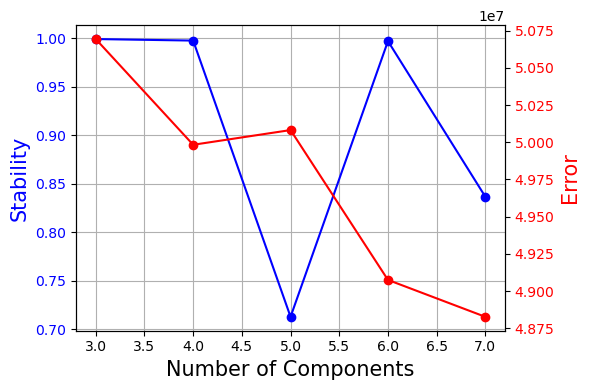

In [8]:
cnmf_obj.k_selection_plot(close_fig=False)

In [9]:
selected_K = 6 # most stable
density_threshold = 2.00 # ensures no filtering

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/cnmf/cnmf.py:835: RuntimeWarning: invalid value encountered in true_divide
  norm_tpm = (np.array(tpm.X.todense()) - tpm_stats['__mean'].values) / tpm_stats['__std'].values
/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


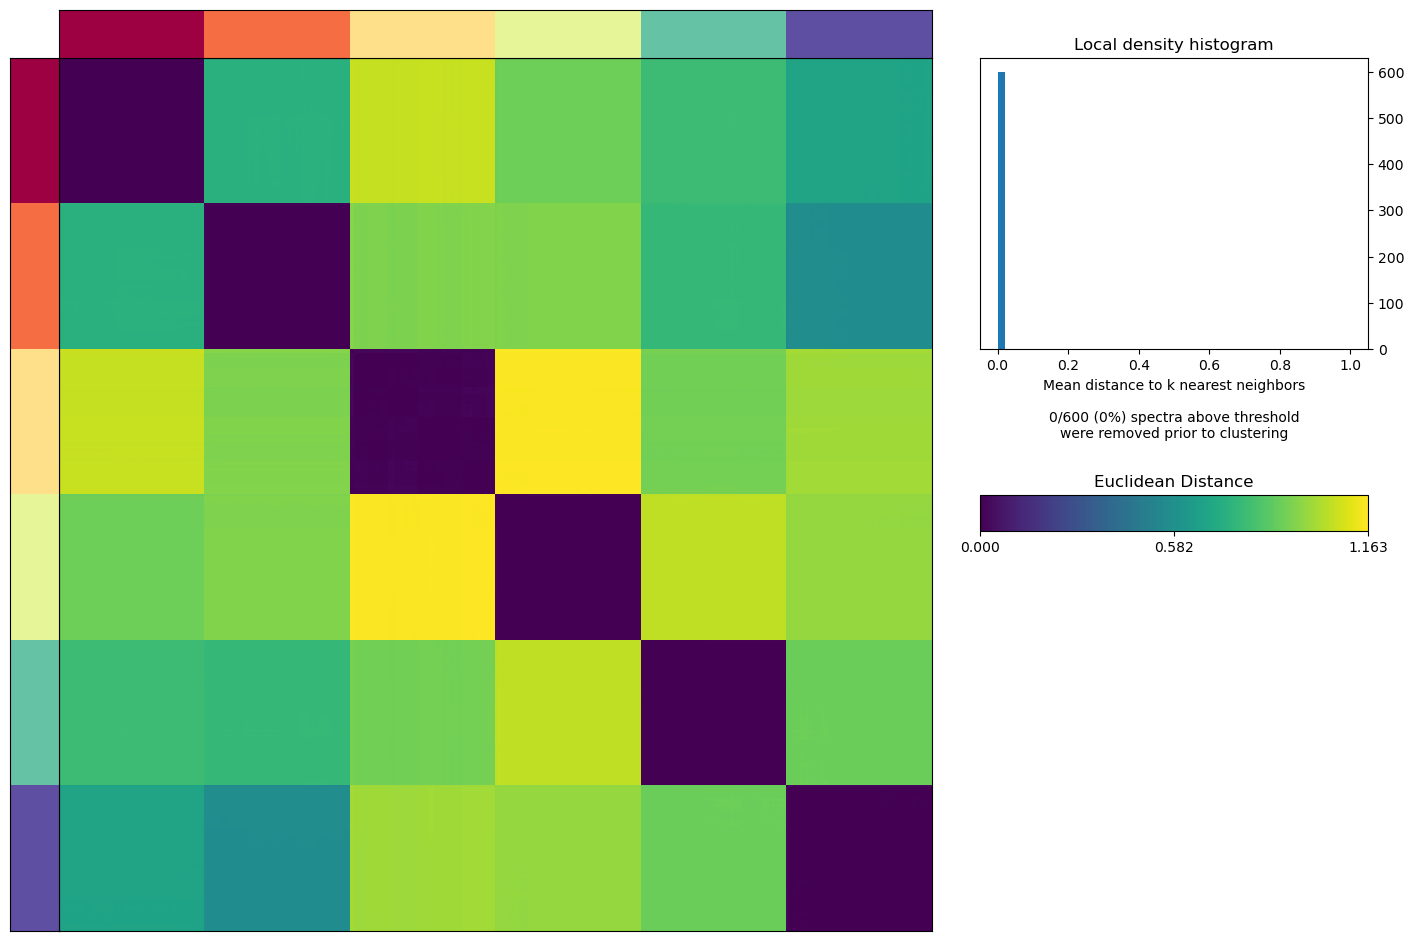

In [10]:
cnmf_obj.consensus(k=selected_K, density_threshold=density_threshold, show_clustering=True, close_clustergram_fig=False)

In [12]:
selected_K = 6 # most stable
density_threshold = 0.1 # based on above plot

/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/cnmf/cnmf.py:835: RuntimeWarning: invalid value encountered in true_divide
  norm_tpm = (np.array(tpm.X.todense()) - tpm_stats['__mean'].values) / tpm_stats['__std'].values
/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


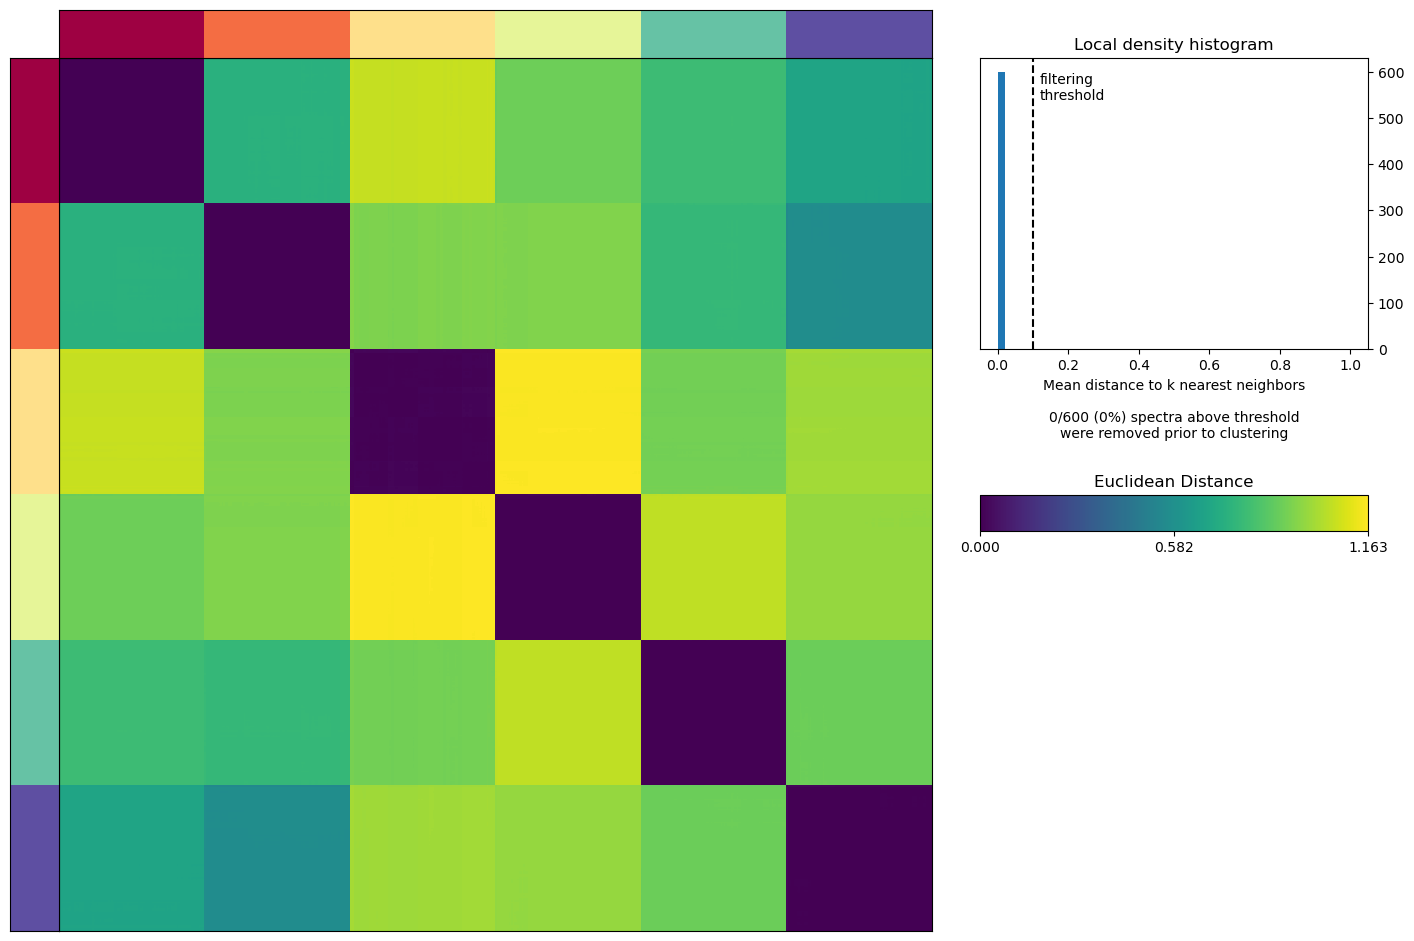

In [13]:
cnmf_obj.consensus(k=selected_K, density_threshold=density_threshold, show_clustering=True, close_clustergram_fig=False)